## Resnet34 muti sz

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# Import basic libraries
import matplotlib.pyplot as plt
import numpy as np
import os,shutil

# Fastai reloads
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#Impost fastai
from fastai.vision import *
from fastai.metrics import error_rate,accuracy
from fastai.callbacks import *
from fastai.imports import *
from fastai.callbacks.mem import PeakMemMetric

from pathlib import Path

from torchvision.models import *
from torch.nn import CrossEntropyLoss
import cv2
#import pretrainedmodels

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
import seaborn as sns

In [4]:
PATH=Path('data/')

## Create Data block (Try with 1/4 size)

In [5]:
tfms=get_transforms(max_rotate=20,max_zoom=1.3,p_lighting=.8,
                    xtra_tfms=[cutout(n_holes=(1,4), length=(5, 10), p=.75), jitter(magnitude=0.005, p=.25)])

In [6]:
img=open_image(PATH/'train_resized_210'/os.listdir(PATH/'train_resized_210')[1])

In [7]:
img.shape

torch.Size([3, 210, 210])

In [8]:
src_size=np.array(img.shape[1:]);src_size

array([210, 210])

In [9]:
np.random.seed(42)
src = (ImageList.from_csv(PATH, 'train.csv', folder='train_resized_210')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' ')
      .add_test_folder('test_resized_210'))

In [10]:
data = (src.transform(tfms, size=src_size//4)
        .databunch(bs=256).normalize(imagenet_stats))        

In [11]:
data.classes

['1', '2', '3', '4', '5']

In [12]:
data

ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: EmptyLabelList
,,,,
Path: data

## Try with ResNET 34

In [91]:
#f1 = partial(fbeta, thresh=0.2, beta = 1)

In [13]:
metrics_custom=[fbeta,accuracy_thresh]

In [14]:
learn=cnn_learner(data,models.resnet18,metrics=metrics_custom)

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


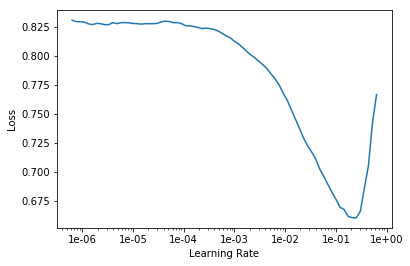

In [25]:
learn.recorder.plot()

In [16]:
lr=2e-2

In [17]:
learn.fit_one_cycle(25,slice(lr),wd=1e-3)

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.740648,0.574720,0.573619,0.719200,00:07
1,0.639634,0.416536,0.647248,0.832320,00:07
2,0.544759,0.390415,0.627581,0.830400,00:08
3,0.485168,0.360187,0.675162,0.843040,00:08
4,0.446591,0.338736,0.694943,0.855360,00:08
5,0.417271,0.327441,0.709676,0.856960,00:08
6,0.392986,0.302406,0.734405,0.870560,00:08
7,0.371484,0.291320,0.748152,0.873760,00:08
8,0.350157,0.282245,0.761224,0.879040,00:08
9,0.334831,0.271062,0.776210,0.881440,00:08


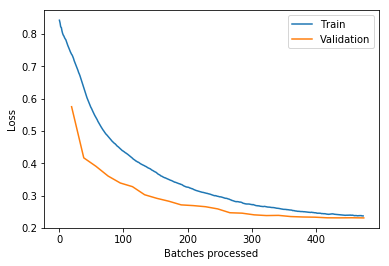

In [18]:
learn.recorder.plot_losses()

In [19]:
learn.unfreeze()

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


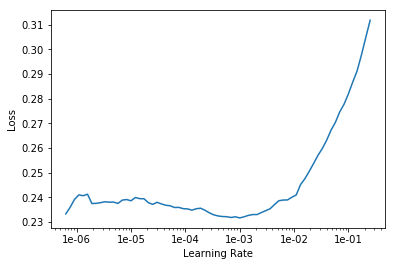

In [21]:
learn.recorder.plot()

In [22]:
lr=9e-4

In [23]:
learn.fit_one_cycle(15,slice(lr,3e-2))

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.250101,0.284333,0.781924,0.896800,00:08
1,0.236374,0.401326,0.734324,0.880800,00:08
2,0.228435,0.352781,0.788438,0.904480,00:10
3,0.224173,0.468411,0.712671,0.874080,00:10
4,0.225379,0.344034,0.776495,0.890240,00:10
5,0.218928,0.290750,0.801371,0.909120,00:10
6,0.208884,0.186256,0.855524,0.925600,00:07
7,0.198432,0.222906,0.826476,0.912320,00:08
8,0.186665,0.182382,0.861562,0.929120,00:08
9,0.172265,0.174145,0.873048,0.931360,00:08


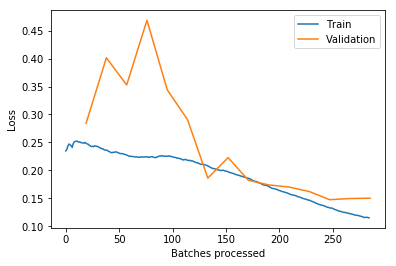

In [24]:
learn.recorder.plot_losses()

In [25]:
learn.save('resnet-34-imagenet-onefrth-stage-2-img210')

In [26]:
learn.load('resnet-34-imagenet-onefrth-stage-2-img210')

Learner(data=ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bia

## Pass 1/3rd size

In [27]:
data = (src.transform(tfms, size=src_size//3)
        .databunch(bs=512).normalize(imagenet_stats))  

In [28]:
learn.data=data

In [29]:
learn.freeze()

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


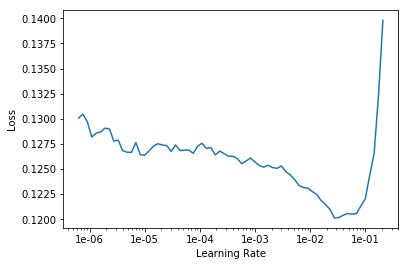

In [31]:
learn.recorder.plot()

In [32]:
lr=2e-3

In [33]:
learn.fit_one_cycle(15,max_lr=slice(lr))

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.113427,0.144841,0.888838,0.944480,00:10
1,0.111302,0.144996,0.886876,0.944160,00:10
2,0.110437,0.144640,0.888305,0.944480,00:09
3,0.111767,0.144722,0.889371,0.944160,00:10
4,0.111987,0.144265,0.887848,0.944480,00:10
5,0.111965,0.143611,0.888457,0.944320,00:10
6,0.111585,0.143757,0.889181,0.944800,00:10
7,0.111253,0.143832,0.888076,0.944160,00:10
8,0.111005,0.142900,0.891143,0.943840,00:10
9,0.110780,0.142721,0.891524,0.943840,00:10


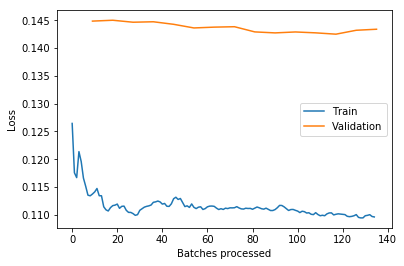

In [34]:
learn.recorder.plot_losses()

In [35]:
learn.save('resnet-34-imagenet-onethrd-stage-3-210')

In [36]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


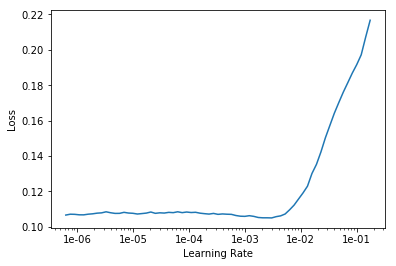

In [37]:
learn.lr_find()
learn.recorder.plot()

In [38]:
lr=5e-4
learn.fit_one_cycle(10,max_lr=slice(lr,2e-3))

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.111593,0.139425,0.891429,0.947680,00:07
1,0.106884,0.147014,0.891867,0.942720,00:11
2,0.102394,0.125984,0.908476,0.950720,00:12
3,0.099374,0.194488,0.863810,0.938240,00:10
4,0.096685,0.150039,0.895010,0.944480,00:11
5,0.092583,0.121641,0.902648,0.954560,00:09
6,0.088302,0.126444,0.901733,0.954560,00:10
7,0.083214,0.135370,0.897791,0.950720,00:11
8,0.078375,0.129085,0.904819,0.953920,00:10
9,0.075277,0.124512,0.903714,0.954400,00:10


In [39]:
learn.save('resnet-34-imagenet-onethrd-stage-4-210')

## Pass half size

In [40]:
data = (src.transform(tfms, size=src_size//2)
        .databunch(bs=256).normalize(imagenet_stats))

In [41]:
learn.data=data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


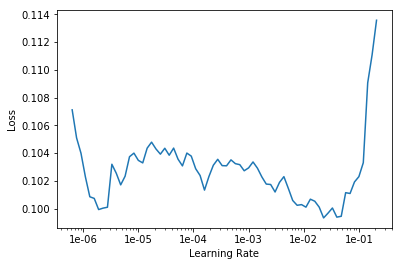

In [42]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [43]:
lr=2e-3
learn.fit_one_cycle(12,max_lr=slice(lr),wd=1e-3)

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.106002,0.130223,0.904762,0.949920,00:09
1,0.104321,0.127149,0.906533,0.950080,00:11
2,0.103690,0.122995,0.909067,0.950720,00:09
3,0.102096,0.119570,0.913738,0.951680,00:10
4,0.099277,0.120758,0.908781,0.952480,00:09
5,0.097374,0.118703,0.913638,0.952640,00:09
6,0.096067,0.117350,0.914438,0.952320,00:11
7,0.093695,0.118754,0.913219,0.952320,00:08
8,0.092599,0.117201,0.914667,0.953600,00:10
9,0.091871,0.116828,0.912762,0.953760,00:09


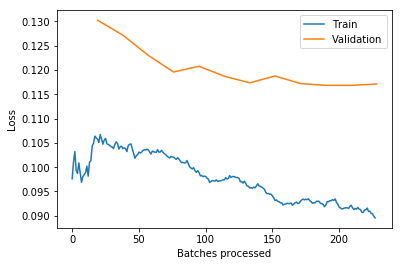

In [44]:
learn.recorder.plot_losses()

In [45]:
learn.save('resnet-34-imagenet-half-stage-5-210')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


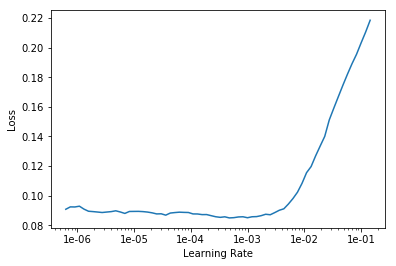

In [46]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [47]:
lr=1e-4
learn.fit_one_cycle(15,max_lr=slice(lr,2e-3))

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.086756,0.114326,0.914857,0.953920,00:12
1,0.087070,0.110273,0.919352,0.956960,00:08
2,0.082272,0.108939,0.921371,0.957440,00:10
3,0.076067,0.131703,0.907409,0.952800,00:10
4,0.072038,0.114187,0.916972,0.958560,00:10
5,0.067832,0.140903,0.897010,0.948960,00:10
6,0.064144,0.115953,0.915148,0.956640,00:09
7,0.061946,0.110661,0.918514,0.960960,00:12
8,0.056061,0.109514,0.920972,0.962880,00:08
9,0.051568,0.114018,0.922743,0.962560,00:10


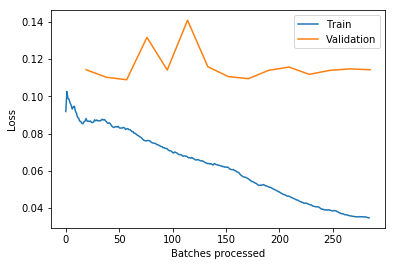

In [48]:
learn.recorder.plot_losses()

In [49]:
learn.save('resnet-34-imagenet-half-stage-6-210')

## Pass full size image

In [50]:
data = (src.transform(tfms, size=src_size)
        .databunch(bs=128).normalize(imagenet_stats))

In [51]:
learn.data=data

In [52]:
learn.data

ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: EmptyLabelList
,,,,
Path: data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


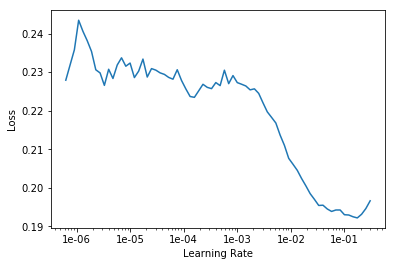

In [53]:
#learn.load('resnet-5-imagenet-half-stage-6-210')
learn.freeze()
learn.data=data
learn.lr_find()
learn.recorder.plot()

In [54]:
lr=1e-2
learn.fit_one_cycle(15,slice(lr),wd=1e-3)

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.213157,0.207283,0.844248,0.929760,00:17
1,0.174186,0.160133,0.875852,0.934880,00:15
2,0.152202,0.149462,0.887010,0.941760,00:10
3,0.132575,0.148780,0.891410,0.940480,00:10
4,0.121855,0.135189,0.903371,0.947680,00:10
5,0.111699,0.130802,0.908000,0.950400,00:10
6,0.104163,0.121900,0.909186,0.952320,00:10
7,0.098061,0.118731,0.916571,0.952800,00:09
8,0.091364,0.124830,0.910076,0.952320,00:10
9,0.088544,0.116785,0.916191,0.956320,00:10


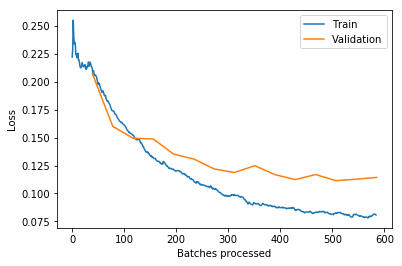

In [55]:
learn.recorder.plot_losses()

In [56]:
learn.save('resnet-34-imagenet-full-stage-7-210')

In [60]:
learn.load('resnet-34-imagenet-full-stage-7-210')

Learner(data=ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stri

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


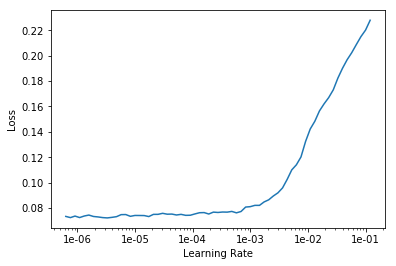

In [58]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [61]:
lr=9e-5
learn.fit_one_cycle(20,max_lr=slice(lr,1e-3))

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.079080,0.110489,0.916514,0.961120,00:10
1,0.077278,0.107979,0.924114,0.959040,00:10
2,0.073694,0.109346,0.919257,0.960480,00:10
3,0.069985,0.107017,0.924114,0.960320,00:10
4,0.065562,0.113744,0.914209,0.957920,00:10
5,0.062161,0.118350,0.918895,0.958400,00:10
6,0.055646,0.105679,0.920972,0.962560,00:10
7,0.050086,0.104301,0.929314,0.962400,00:10
8,0.045767,0.102341,0.933105,0.967840,00:10
9,0.037892,0.208921,0.880248,0.941760,00:10


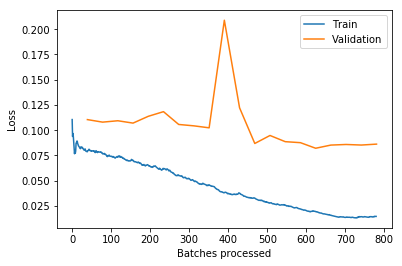

In [62]:
learn.recorder.plot_losses()

In [63]:
learn.save('resnet-34-imagenet-full-stage-8-210')

In [65]:
test_pred_tta=learn.TTA(ds_type=DatasetType.Test)

In [66]:
test_pred_tta

(tensor([[8.9897e-01, 4.7270e-03, 2.2101e-02, 2.3031e-02, 5.4112e-02],
         [3.6070e-05, 5.6036e-03, 9.9925e-01, 2.5516e-05, 4.1546e-04],
         [7.3554e-01, 6.7603e-02, 1.7947e-03, 1.3406e-01, 7.4781e-02],
         ...,
         [6.4527e-03, 4.8068e-02, 8.6049e-01, 2.6847e-04, 7.2635e-02],
         [1.8205e-02, 9.7401e-01, 8.2595e-04, 4.9619e-03, 2.5159e-03],
         [9.9007e-01, 1.4970e-04, 4.0416e-04, 4.2536e-05, 8.3819e-03]]),
 tensor([0, 0, 0,  ..., 0, 0, 0]))

In [67]:
preds = np.argmax(test_pred_tta[0], 1)
preds

tensor([0, 2, 0,  ..., 2, 1, 0])

In [68]:
a=array(preds)

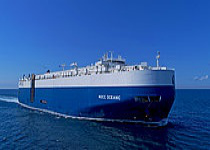

In [69]:
data.test_ds.x[1]

In [70]:
test_img_names = [Path(i).name for i in learn.data.test_ds.x.items]

In [71]:
submission = pd.DataFrame({'image': test_img_names, 'category': a+1})
submission.head(10)

,image,category
0,2904735.jpg,1
1,2890616.jpg,3
2,2902677.jpg,1
3,2741468.jpg,4
4,2802610.jpg,5
5,1630950.jpg,4
6,2882184.jpg,3
7,2787793.jpg,2
8,2866032.jpg,1
9,2369442.jpg,2


In [72]:
len(submission)

2680

In [73]:
submission.to_csv(PATH/'submission_resnet34_multisz-210.csv',index=False)

## Merge the validation set

In [78]:
np.random.seed(42)
src = (ImageList.from_csv(PATH, 'train.csv', folder='train_resized')
       .split_by_rand_pct(0)
       .label_from_df(label_delim=' ')
      .add_test_folder('test_resized'))

In [79]:
data = (src.transform(tfms, size=src_size)
        .databunch(bs=128).normalize(imagenet_stats))

In [82]:
data

ImageDataBunch;

Train: LabelList (6252 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (0 items)
x: ImageList

y: MultiCategoryList

Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: EmptyLabelList
,,,,
Path: data

In [84]:
learn.load('resnet-5-imagenet-full-stage-8')

Learner(data=ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stri

In [85]:
learn.data=data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


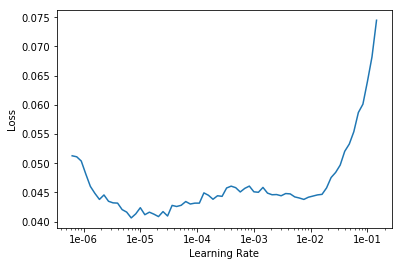

In [86]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [87]:
lr=9e-6
learn.fit_one_cycle(15,max_lr=slice(lr)).mixup().to_f16()

AttributeError: 'NoneType' object has no attribute 'mixup'

In [88]:
learn.save('resnet-5-imagenet-full-stage-8-noval')

In [89]:
test_pred_tta=learn.TTA(ds_type=DatasetType.Test)

In [90]:
preds = np.argmax(test_pred_tta[0], 1)
a=array(preds)
submission = pd.DataFrame({'image': test_img_names, 'category': a+1})
submission.to_csv(PATH/'submission_resnet18_multisz-noval.csv',index=False)